# Breast Cancer Diagnosis 

- Diagnostic Wisconsin Breast Cancer Database. 569 patients and 30 attributes.

- Data is from https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)


- I will try to build an unsupervised machine learning to predict the patients who have cancer.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
data = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [5]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [7]:
target = pd.DataFrame(cancer['target'],columns=['Cancer'])

In [8]:
pd.value_counts(target['Cancer'])

1    357
0    212
Name: Cancer, dtype: int64

In [9]:
target.head()

,Cancer
0,0
1,0
2,0
3,0
4,0


In [10]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


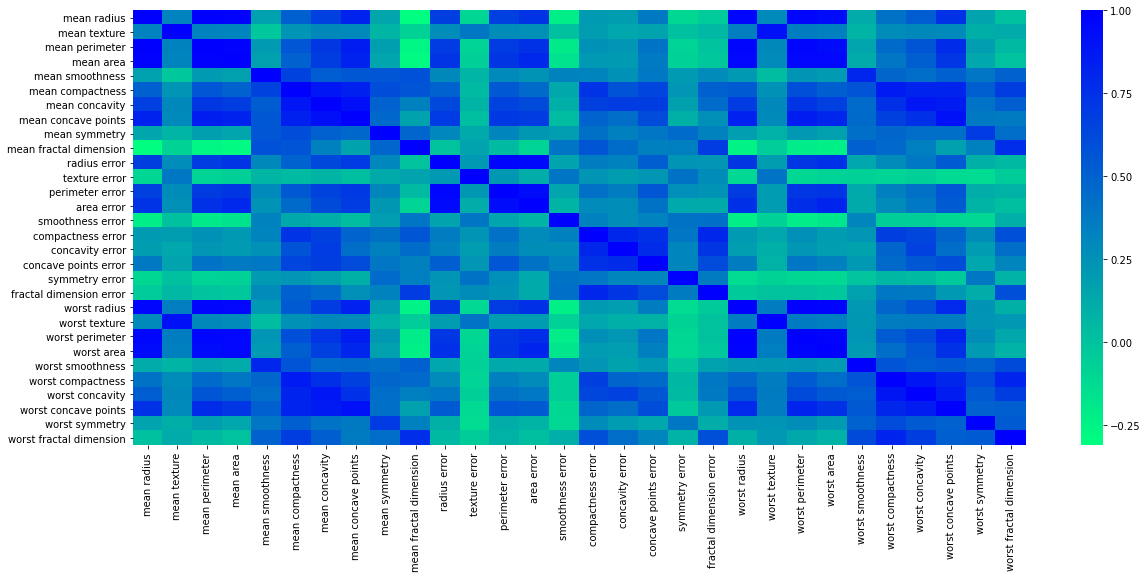

In [11]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(), cmap='winter_r')

## As we have big numbers in the data, they should be transformed so that we can avoid the bias stemming from large numbers.

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
sca = StandardScaler()

In [14]:
scaled = sca.fit_transform(data)

In [15]:
len(scaled)

569

## Let's reduce dimensionality.

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components=2)

In [18]:
pca_X = pca.fit_transform(scaled)

## Creating K Means Clustering algorithm to label patients. I will be creating 2 clusters; patients with cancer and healthy patients.

In [19]:
from sklearn.cluster import KMeans

In [28]:
kmc = KMeans(n_clusters=2)

In [29]:
kmc.fit(pca_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
from sklearn.metrics import classification_report

## 91% Accuracy. It is perfect considering that computer had no idea whether a patient is healthy or not.

In [41]:
print(classification_report(target['Cancer'], kmc.labels_))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       212
           1       0.90      0.96      0.93       357

    accuracy                           0.91       569
   macro avg       0.91      0.89      0.90       569
weighted avg       0.91      0.91      0.91       569



In [42]:
import cycler
plt.style.use('ggplot')

## True clusters on the left and my model on the right which is pretty accurate other than some outliers.

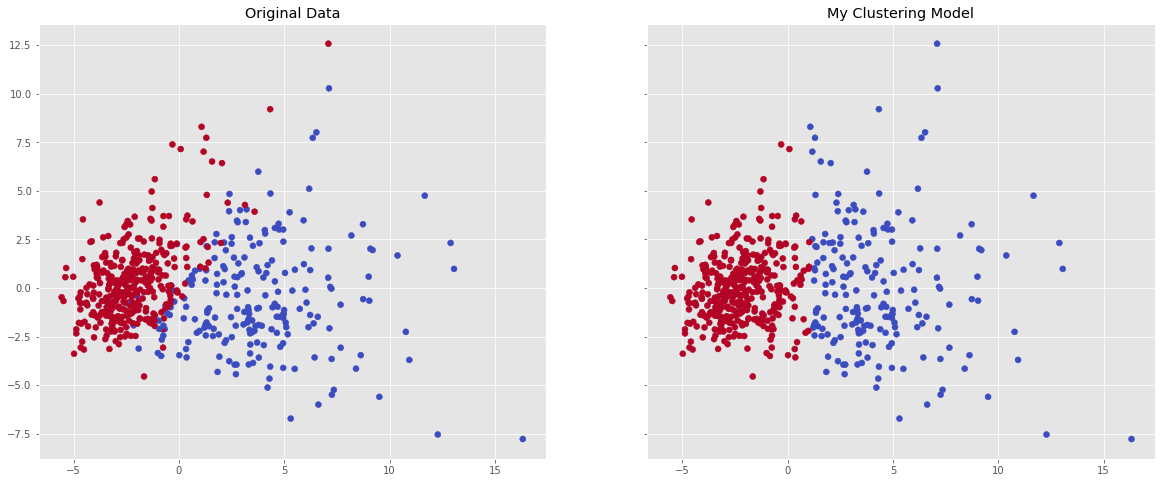

In [43]:
f, (axis1, axis2) = plt.subplots(1, 2, sharey=True,figsize=(20,8))

axis1.set_title('Original Data')
axis1.scatter(pca_X[:,0], pca_X[:,1], c=target['Cancer'], cmap='coolwarm')

axis2.set_title('My Clustering Model')
axis2.scatter(pca_X[:,0], pca_X[:,1], c=kmc.labels_, cmap='coolwarm')

In [44]:
data['Cancer'] = target['Cancer']

In [45]:
data['Prediction'] = kmc.labels_

## 53 patients out of 569 are diagnosed wrong by the model.

In [46]:
wrong_predictions = data[data['Cancer']!=data['Prediction']]

In [47]:
wrong_predictions.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer,Prediction
10,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,...,123.80,1150.0,0.11810,0.15510,0.14590,0.09975,0.2948,0.08452,0,1
13,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,0.05338,...,112.00,876.5,0.11310,0.19240,0.23220,0.11190,0.2809,0.06287,0,1
16,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,0.1586,0.05922,...,123.40,1138.0,0.14640,0.18710,0.29140,0.16090,0.3029,0.08216,0,1
38,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,...,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,0,1
39,13.48,20.82,88.40,559.2,0.10160,0.12550,0.10630,0.05439,0.1720,0.06419,...,107.30,740.4,0.16100,0.42250,0.50300,0.22580,0.2807,0.10710,0,1


In [48]:
len(wrong_predictions)

53

## Let's check the intolerable mistakes. 16 patients out of 569 are diagnosed healthy although they had cancer. However, recall is 96%. It means that the model accomplished to find 96%(341/357) of patients who has cancer.

In [49]:
crucial_mistakes = wrong_predictions[(wrong_predictions['Cancer']==1) & (wrong_predictions['Prediction']==0)]

In [50]:
crucial_mistakes

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer,Prediction
68,9.029,17.33,58.79,250.5,0.10660,0.1413,0.31300,0.04375,0.2111,0.08046,...,65.50,324.7,0.14820,0.4365,1.2520,0.1750,0.4228,0.11750,1,0
81,13.340,15.86,86.49,520.0,0.10780,0.1535,0.11690,0.06987,0.1942,0.06902,...,96.66,614.9,0.15360,0.4791,0.4858,0.1708,0.3527,0.10160,1,0
89,14.640,15.24,95.77,651.9,0.11320,0.1339,0.09966,0.07064,0.2116,0.06346,...,109.40,803.6,0.12770,0.3089,0.2604,0.1397,0.3151,0.08473,1,0
112,14.260,19.65,97.83,629.9,0.07837,0.2233,0.30030,0.07798,0.1704,0.07769,...,107.00,709.0,0.08949,0.4193,0.6783,0.1505,0.2398,0.10820,1,0
128,15.100,16.39,99.58,674.5,0.11500,0.1807,0.11380,0.08534,0.2001,0.06467,...,105.90,762.6,0.13860,0.2883,0.1960,0.1423,0.2590,0.07779,1,0
152,9.731,15.34,63.78,300.2,0.10720,0.1599,0.41080,0.07857,0.2548,0.09296,...,71.04,380.5,0.12920,0.2772,0.8216,0.1571,0.3108,0.12590,1,0
176,9.904,18.06,64.60,302.4,0.09699,0.1294,0.13070,0.03716,0.1669,0.08116,...,73.07,390.2,0.13010,0.2950,0.3486,0.0991,0.2614,0.11620,1,0
242,11.300,18.19,73.93,389.4,0.09592,0.1325,0.15480,0.02854,0.2054,0.07669,...,87.16,472.9,0.13470,0.4848,0.7436,0.1218,0.3308,0.12970,1,0
290,14.410,19.73,96.03,651.0,0.08757,0.1676,0.13620,0.06602,0.1714,0.07192,...,101.70,767.3,0.09983,0.2472,0.2220,0.1021,0.2272,0.08799,1,0
318,9.042,18.90,60.07,244.5,0.09968,0.1972,0.19750,0.04908,0.2330,0.08743,...,68.62,297.1,0.12210,0.3748,0.4609,0.1145,0.3135,0.10550,1,0
